In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfClean = pd.read_csv('dfClean.csv')

In [3]:
# Dictionnaire pour stocker les correspondances entre les abréviations et les noms complets des états
state_dict = {
    'RJ': 'Rio de Janeiro',
    'SP': 'São Paulo',
    'MG': 'Minas Gerais',
    'PR': 'Paraná',
    'GO': 'Goiás',
    'BA': 'Bahia',
    'AL': 'Alagoas',
    'MS': 'Mato Grosso do Sul',
    'CE': 'Ceará',
    'DF': 'District fédéral (Brasília)',
    'RS': 'Rio Grande do Sul',
    'PE': 'Pernambuco',
    'SC': 'Santa Catarina',
    'MA': 'Maranhão',
    'PA': 'Pará',
    'MT': 'Mato Grosso',
    'ES': 'Espírito Santo',
    'PB': 'Paraíba',
    'AM': 'Amazonas',
    'AP': 'Amapá',
    'PI': 'Piauí',
    'TO': 'Tocantins',
    'RO': 'Rondônia',
    'SE': 'Sergipe',
    'RN': 'Rio Grande do Norte',
    'AC': 'Acre',
    'RR': 'Roraima'
}


In [4]:
# On applique le dictionnaire aux colonnes voulues
dfClean['seller_state'] = dfClean['seller_state'].map(state_dict)
dfClean['customer_state'] = dfClean['customer_state'].map(state_dict)

NameError: name 'dfClean' is not defined

In [5]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99661 entries, 0 to 99660
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  99661 non-null  object 
 1   order_item_id             99661 non-null  int64  
 2   product_id                99661 non-null  object 
 3   seller_id                 99661 non-null  object 
 4   shipping_limit_date       99661 non-null  object 
 5   price                     99661 non-null  float64
 6   freight_value             99661 non-null  float64
 7   totalPrice                99661 non-null  float64
 8   review_score              99661 non-null  float64
 9   customer_id               99661 non-null  object 
 10  payment_type              99661 non-null  object 
 11  customer_zip_code_prefix  99661 non-null  int64  
 12  customer_city             99661 non-null  object 
 13  customer_state            99661 non-null  object 
 14  seller

In [6]:
dfClean.describe()

,order_item_id,price,freight_value,totalPrice,review_score,customer_zip_code_prefix,seller_zip_code_prefix
count,99661.000000,99661.000000,99661.000000,99661.000000,99661.000000,99661.000000,99661.000000
mean,1.139603,136.376785,22.688784,159.065569,4.104876,35107.566079,24671.334775
std,0.530229,207.120377,20.886612,216.601375,1.331166,29750.959629,27703.563126
min,1.000000,0.850000,0.000000,9.590000,1.000000,1003.000000,1001.000000
25%,1.000000,45.900000,13.750000,61.750000,4.000000,11380.000000,6429.000000
50%,1.000000,85.000000,17.100000,104.170000,5.000000,24421.000000,13720.000000
75%,1.000000,149.900000,23.720000,176.160000,5.000000,58475.000000,29156.000000
max,21.000000,13440.000000,1002.300000,13664.080000,5.000000,99980.000000,99730.000000


In [7]:
dfClean['customer_id'].value_counts()

9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
2ba91e12e5e4c9f56b82b86d9031d329    24
b246eeed30b362c09d867b9e598bee51    22
270c23a11d024a44c896d1894b261a83    21
                                    ..
d7440fbffd81b24d87b206be574d2604     1
53c996d70be78077dd4c97f771d9f32f     1
793864114259d54262b38703f165acd2     1
c99b24cb5ce51490cac3a1ff21d153bc     1
96d649da0cc4ff33bb408b199d4c7dcf     1
Name: customer_id, Length: 94902, dtype: int64

In [8]:
dfClean['product_category_name'].value_counts()

Housing                         17827
Parfum et soin                  12364
Informatique et electronique    10864
Sport                            9056
Furniture                        8530
Gadget                           8373
Cadeaux                          5942
Quincalerie                      4861
Telephonie et sécurite           4545
Automobile                       4251
Livre et papeterie               3211
Utilitaire pour bebe             2940
Fashion                          2505
Animalerie                       1769
Nourriture et cuisine            1297
Musique et instruments           1120
Art et manufacture                206
Name: product_category_name, dtype: int64

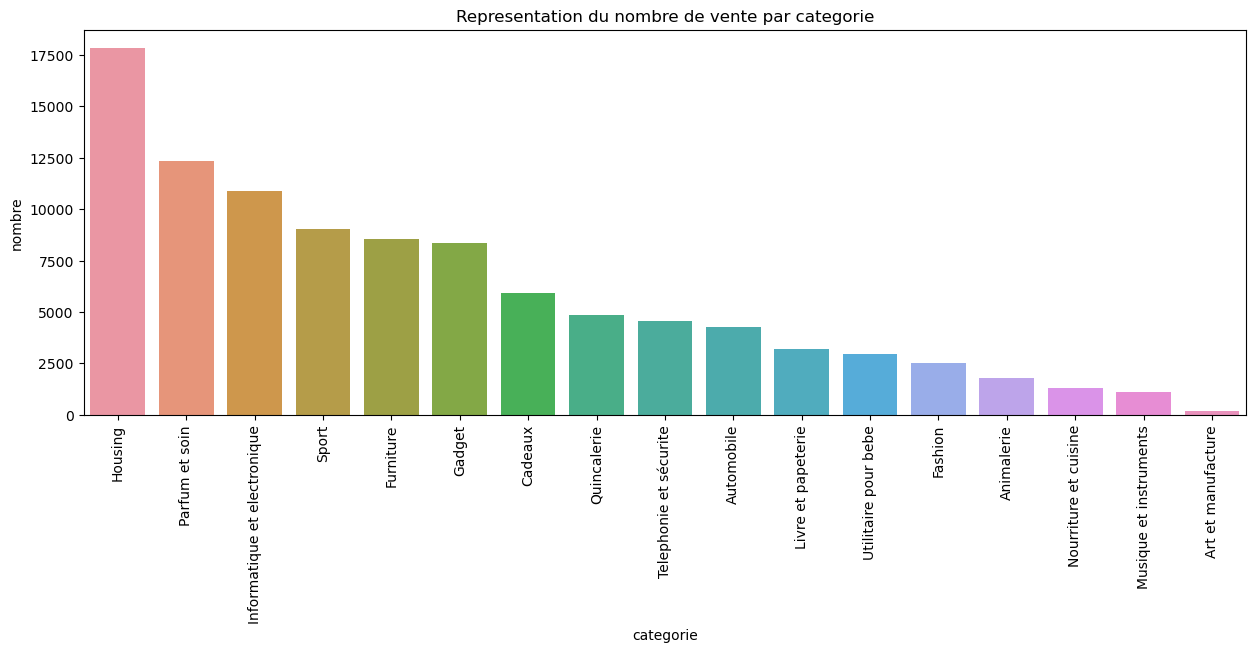

In [9]:
plt.figure(figsize=(15,5))

plt.title("Representation du nombre de vente par categorie")

sns.countplot(x='product_category_name', data=dfClean, orient='v', order=dfClean['product_category_name'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('categorie')
plt.ylabel('nombre')
plt.show()


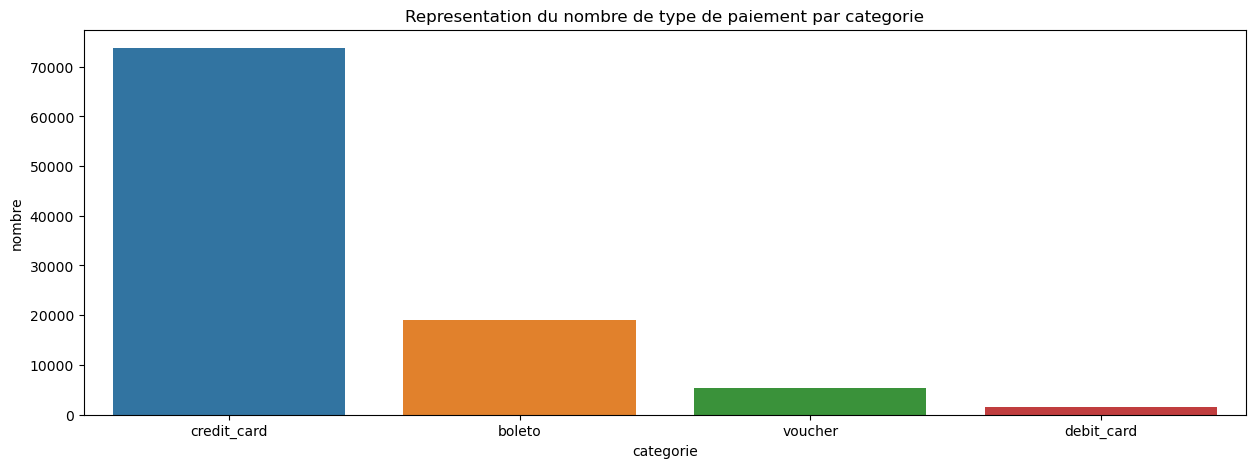

In [10]:
plt.figure(figsize=(15,5))

plt.title("Representation du nombre de type de paiement par categorie")

sns.countplot(x='payment_type', data=dfClean, orient='v', order=dfClean['payment_type'].value_counts().index)

plt.xlabel('categorie')
plt.ylabel('nombre')
plt.show()

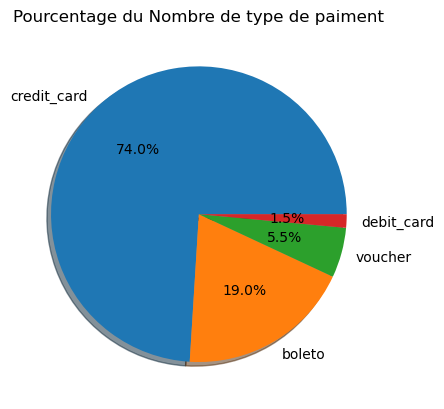

In [11]:
reviews_count = dfClean['payment_type'].value_counts()

plt.pie(reviews_count, labels=reviews_count.index, autopct='%1.1f%%', shadow=True)
plt.title('Pourcentage du Nombre de type de paiment')
plt.show()

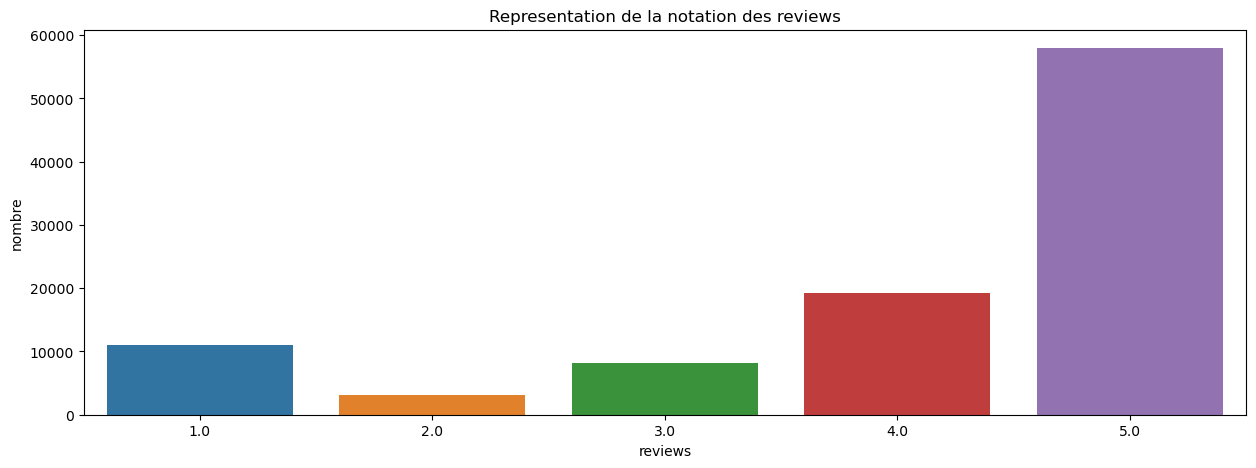

In [12]:
plt.figure(figsize=(15,5))

plt.title("Representation de la notation des reviews")

sns.countplot(x='review_score', data=dfClean, orient='v')

plt.xlabel('reviews')
plt.ylabel('nombre')
plt.show()

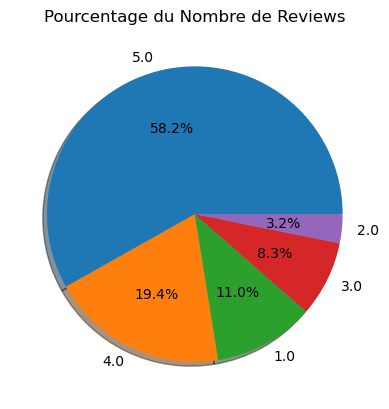

In [13]:

reviews_count = dfClean['review_score'].value_counts()

plt.pie(reviews_count, labels=reviews_count.index, autopct='%1.1f%%', shadow=True)
plt.title('Pourcentage du Nombre de Reviews')
plt.show()

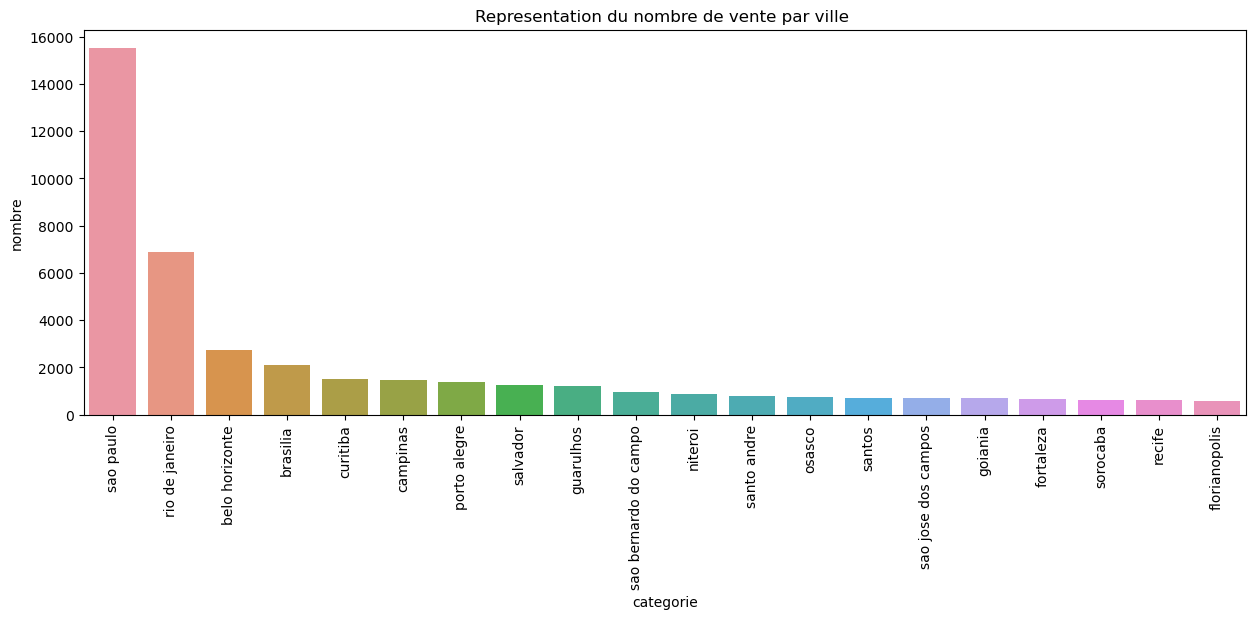

In [14]:
plt.figure(figsize=(15,5))

plt.title("Representation du nombre de vente par ville ")

sns.countplot(x='customer_city', data=dfClean, orient='v', order=dfClean['customer_city'].value_counts().index[:20])
plt.xticks(rotation = 90)
plt.xlabel('categorie')
plt.ylabel('nombre')
plt.show()

In [15]:
dfClean['customer_city'].value_counts()

sao paulo                15515
rio de janeiro            6892
belo horizonte            2756
brasilia                  2120
curitiba                  1517
                         ...  
taquarucu do sul             1
sao jose da boa vista        1
lagoa salgada                1
herveiras                    1
tenente ananias              1
Name: customer_city, Length: 4069, dtype: int64

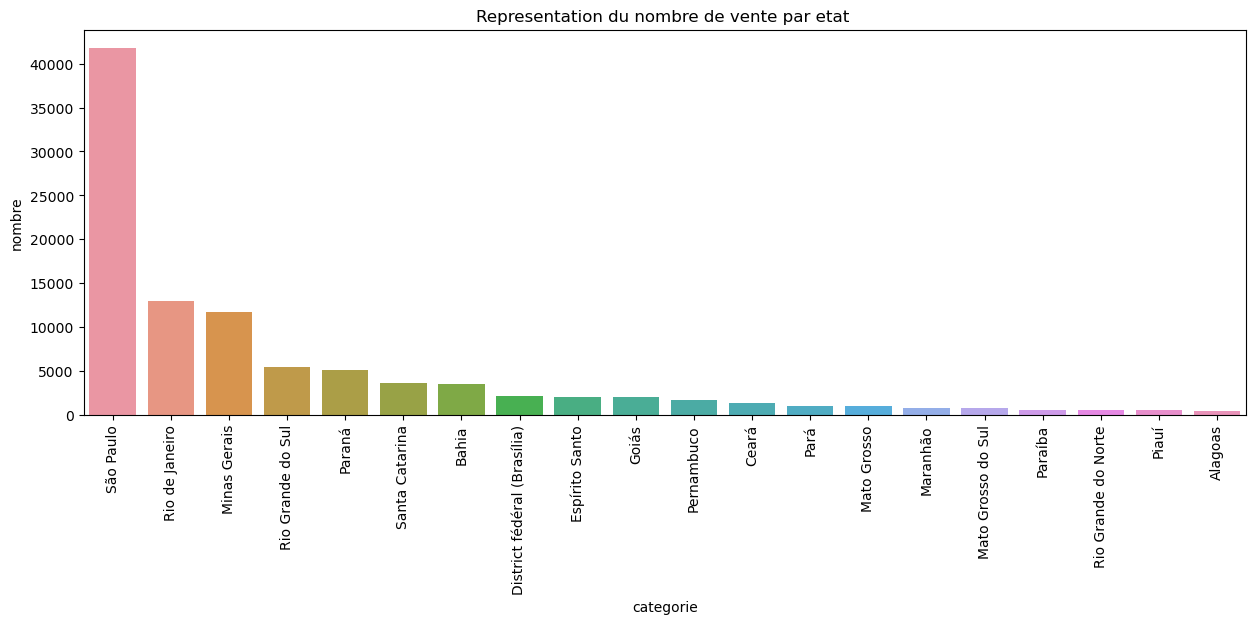

In [16]:
plt.figure(figsize=(15,5))

plt.title("Representation du nombre de vente par etat ")

sns.countplot(x='customer_state', data=dfClean, orient='v', order=dfClean['customer_state'].value_counts().index[:20])
plt.xticks(rotation = 90)
plt.xlabel('categorie')
plt.ylabel('nombre')
plt.show()

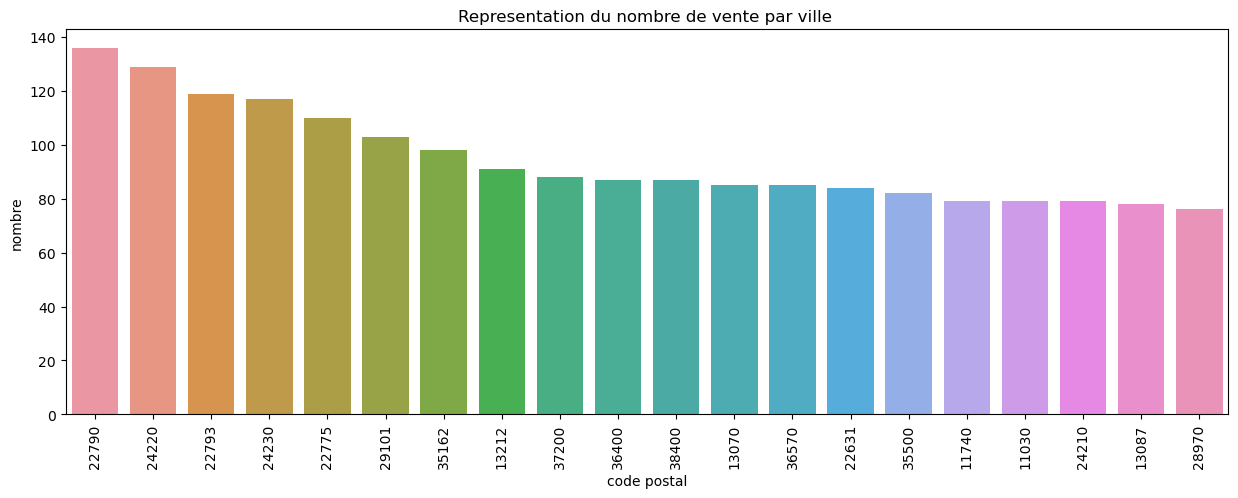

In [17]:
plt.figure(figsize=(15,5))

plt.title("Representation du nombre de vente par ville ")

sns.countplot(x='customer_zip_code_prefix', data=dfClean, orient='v', order=dfClean['customer_zip_code_prefix'].value_counts().index[:20])
plt.xticks(rotation = 90)
plt.xlabel('code postal')
plt.ylabel('nombre')
plt.show()

In [18]:

dfClean.groupby('product_category_name')['totalPrice'].sum()

product_category_name
Animalerie                       263480.76
Art et manufacture                28868.52
Automobile                       763120.92
Cadeaux                         1367587.69
Fashion                          256070.20
Furniture                       1411376.52
Gadget                          1533775.04
Housing                         2503007.27
Informatique et electronique    1743848.69
Livre et papeterie               372292.99
Musique et instruments           298914.61
Nourriture et cuisine            124100.72
Parfum et soin                  1946274.30
Quincalerie                      885470.63
Sport                           1377383.35
Telephonie et sécurite           475256.23
Utilitaire pour bebe             501805.24
Name: totalPrice, dtype: float64

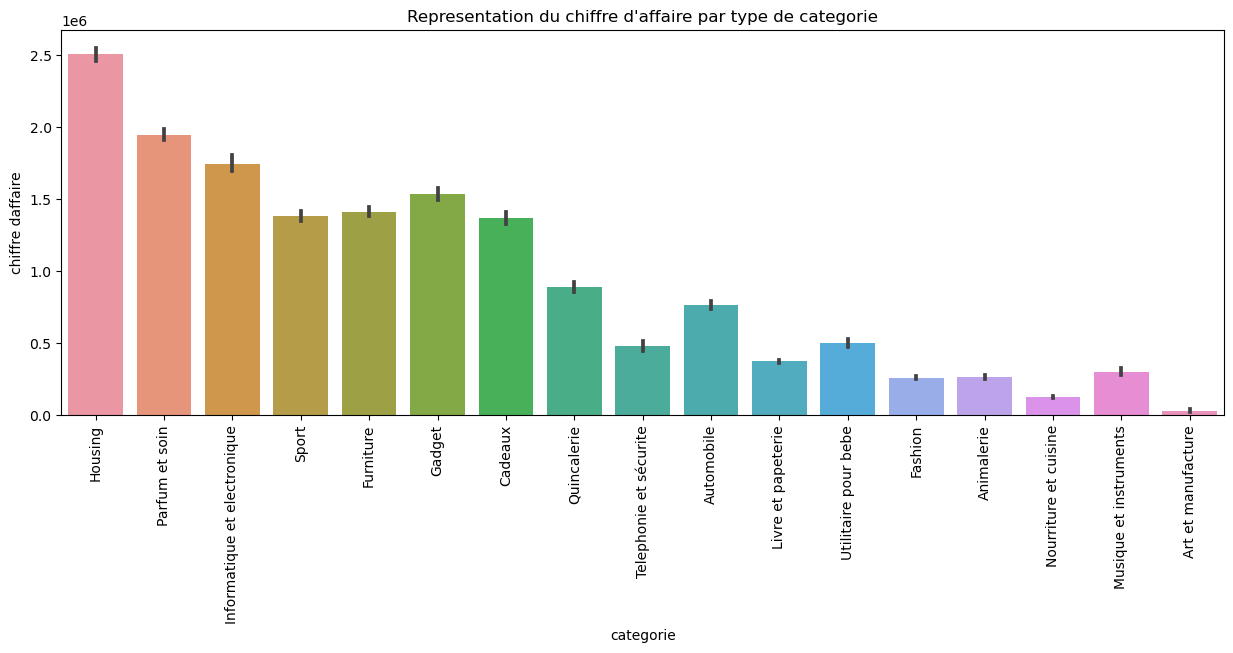

In [19]:
plt.figure(figsize=(15,5))

plt.title("Representation du chiffre d'affaire par type de categorie")
sns.barplot(x='product_category_name', y='totalPrice', data=dfClean,estimator=sum,orient='v', order=dfClean['product_category_name'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('categorie')
plt.ylabel('chiffre daffaire')
plt.show()

In [20]:
dfGroupbyCustomerId = dfClean.groupby('customer_state')['customer_id'].count().reset_index()

In [21]:
dfGroupbyCustomerId

,customer_state,customer_id
0,Acre,82
1,Alagoas,416
2,Amapá,68
3,Amazonas,145
4,Bahia,3467
5,Ceará,1346
6,District fédéral (Brasília),2130
7,Espírito Santo,2031
8,Goiás,2007
9,Maranhão,742


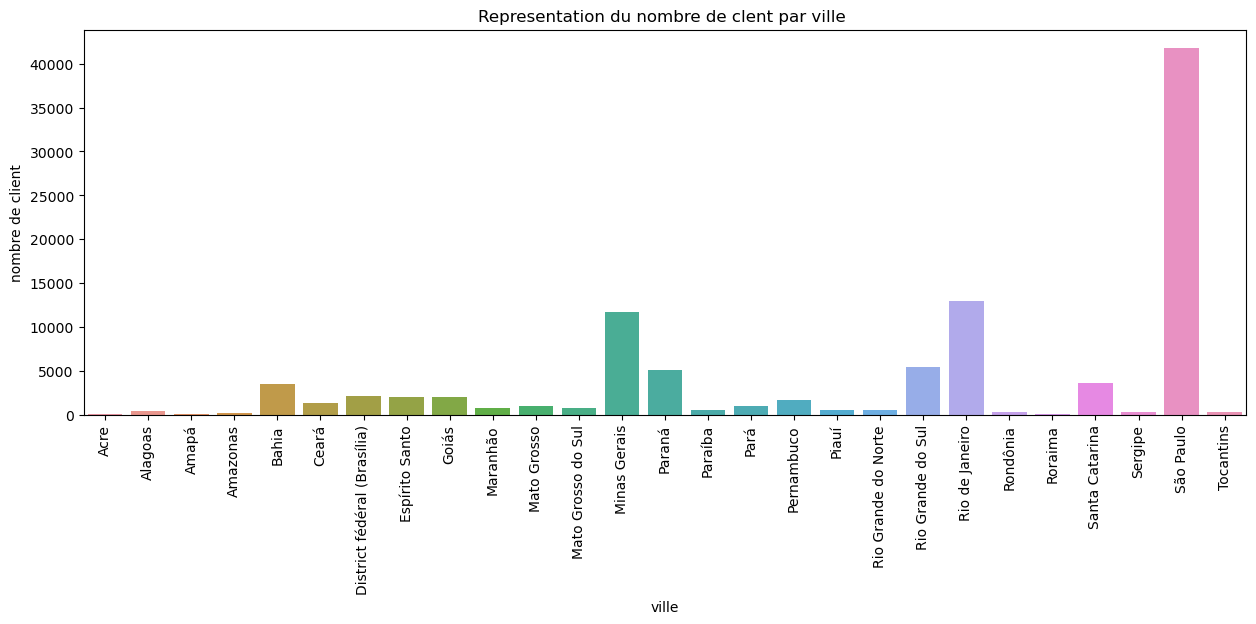

In [22]:
plt.figure(figsize=(15,5))

plt.title("Representation du nombre de clent par ville ")

sns.barplot(x='customer_state', y = 'customer_id' ,data=dfGroupbyCustomerId)
plt.xticks(rotation = 90)
plt.xlabel('ville')
plt.ylabel('nombre de client')
plt.show()

In [23]:
dfClean['date'] = dfClean['shipping_limit_date'].str[0:4]

In [24]:
dfClean_without_2016 = dfClean[dfClean['date'] != '2016']

In [25]:
dfClean_without_2016_and_2020 = dfClean_without_2016[dfClean_without_2016['date'] != '2020']

In [26]:
total_price_by_year_category = dfClean_without_2016_and_2020.groupby(['date','product_category_name'])['totalPrice'].sum()

In [27]:
total_price_by_year_category

date  product_category_name       
2017  Animalerie                       102957.57
      Art et manufacture                10458.54
      Automobile                       307617.99
      Cadeaux                          543549.79
      Fashion                          144119.86
      Furniture                        651281.17
      Gadget                           926329.98
      Housing                         1051618.96
      Informatique et electronique     828869.35
      Livre et papeterie               139723.05
      Musique et instruments           120053.31
      Nourriture et cuisine             52583.30
      Parfum et soin                   811914.08
      Quincalerie                      381607.54
      Sport                            646818.60
      Telephonie et sécurite           214193.80
      Utilitaire pour bebe             181184.95
2018  Animalerie                       159331.65
      Art et manufacture                18409.98
      Automobile                  

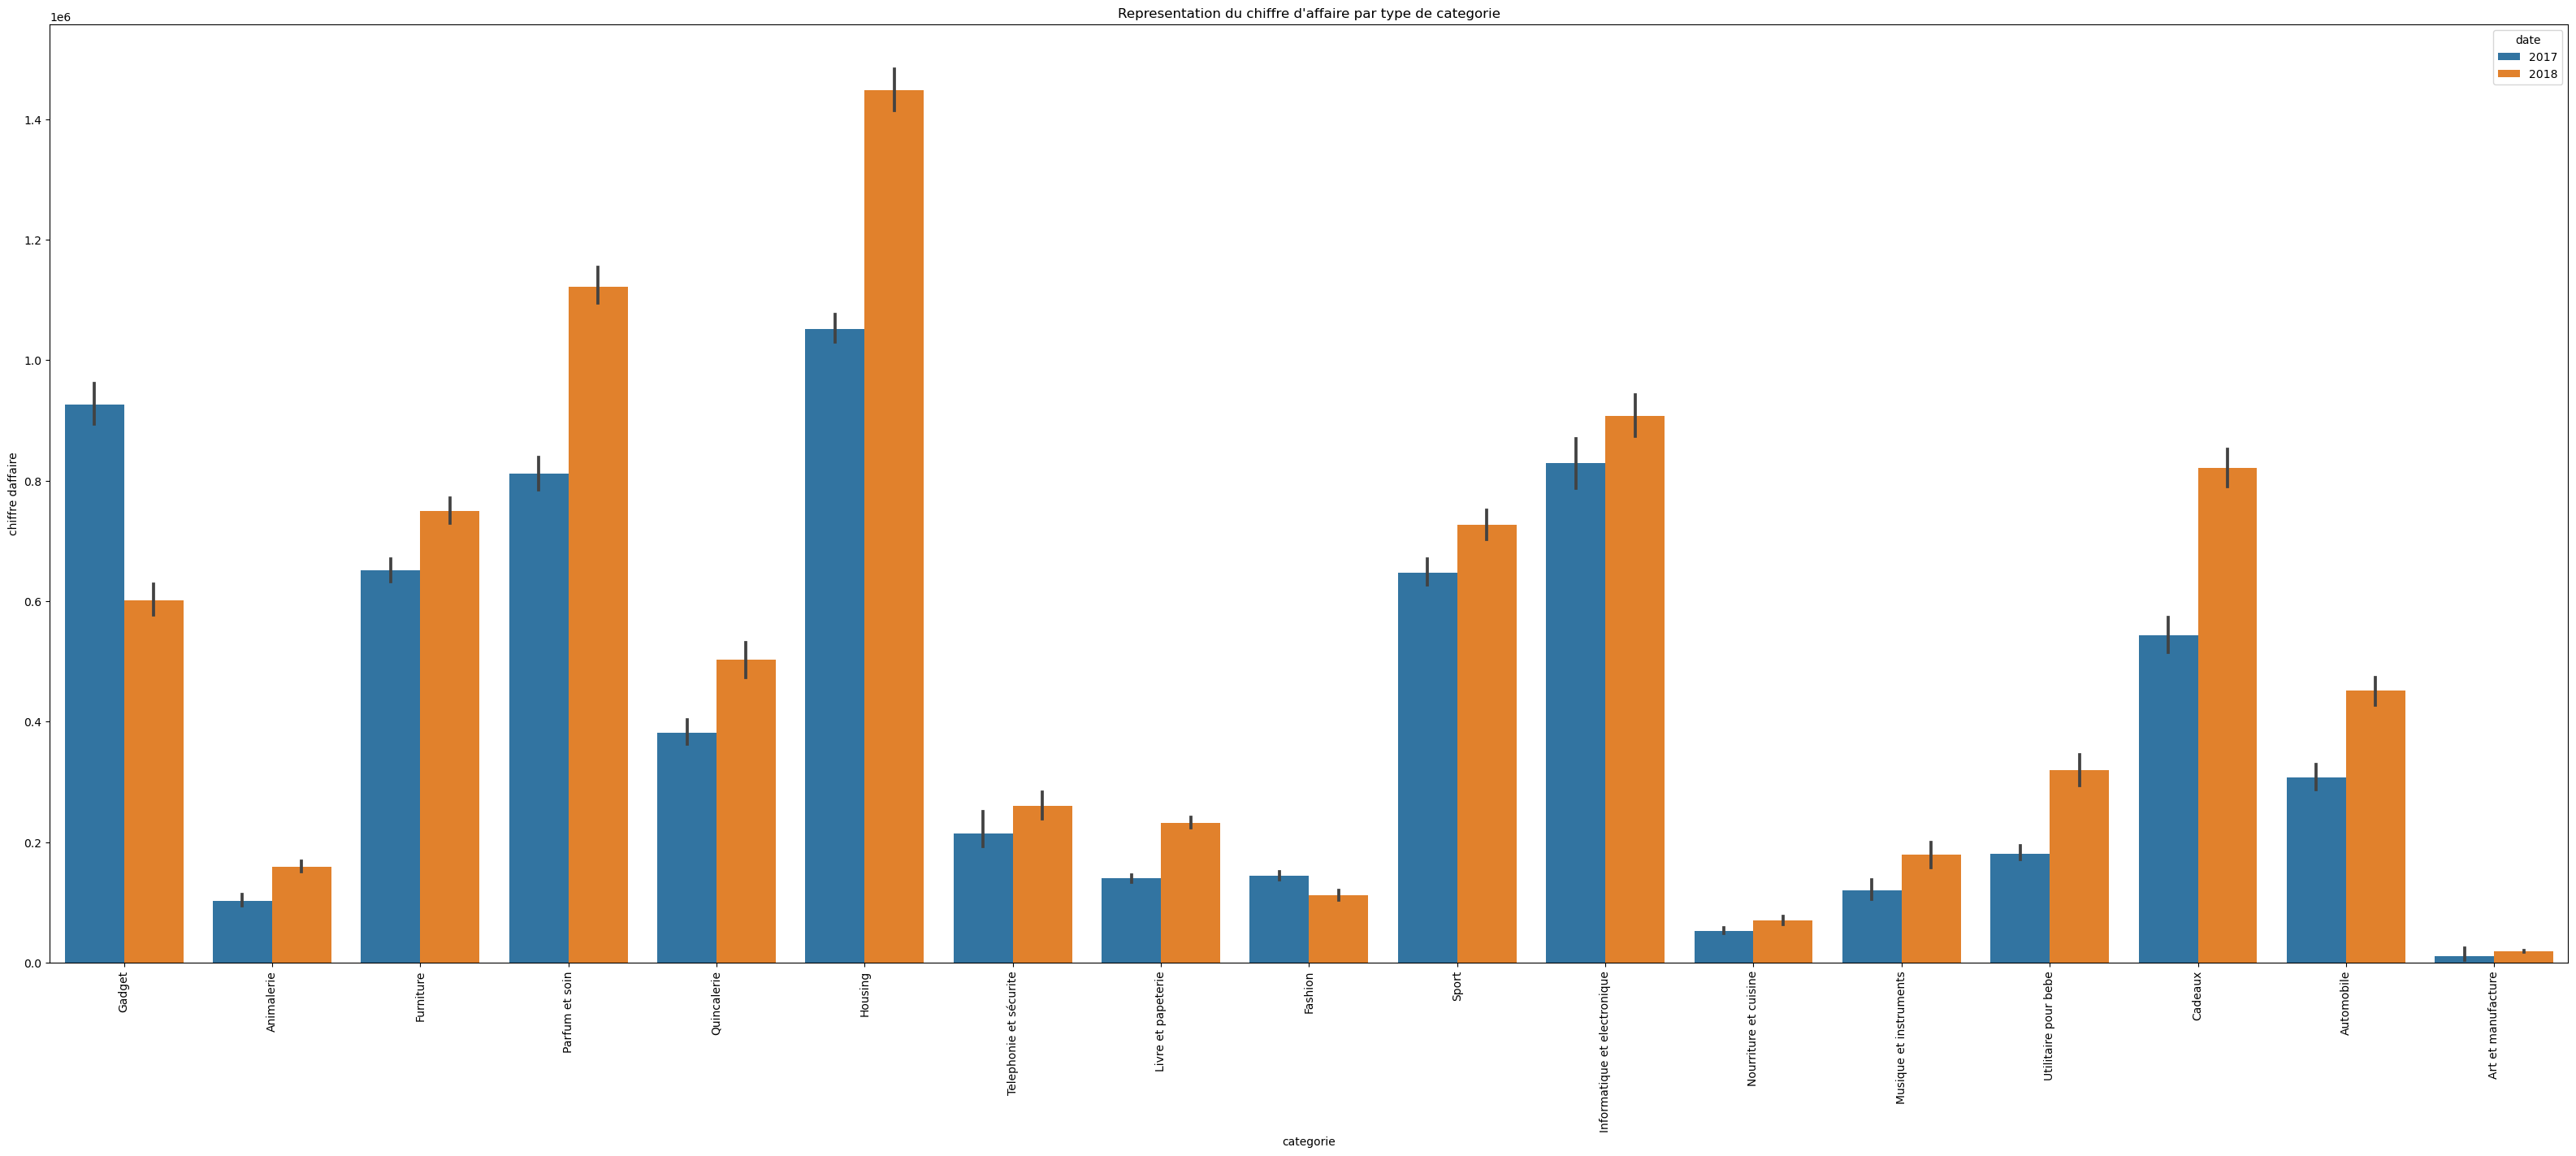

In [28]:
plt.figure(figsize=(40,15))

plt.title("Representation du chiffre d'affaire par type de categorie")
sns.barplot(x="product_category_name", y="totalPrice", hue="date", data=dfClean_without_2016_and_2020 ,estimator=sum)
plt.xticks(rotation = 90)
plt.xlabel('categorie')
plt.ylabel('chiffre daffaire')
plt.show()

order_id                    0
order_item_id               0
product_id                  0
seller_id                   0
shipping_limit_date         0
price                       0
freight_value               0
totalPrice                  0
review_score                0
customer_id                 0
payment_type                0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
seller_zip_code_prefix      0
seller_city                 0
seller_state                0
product_category_name       0
date                        0
dtype: int64

In [30]:
dfClean_without_2016_and_2020.drop('price', axis=1, inplace=True)

/tmp/ipykernel_7305/128533988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean_without_2016_and_2020.drop('price', axis=1, inplace=True)


In [31]:
dfClean_without_2016_and_2020.drop('freight_value', axis=1, inplace=True)

/tmp/ipykernel_7305/816203834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean_without_2016_and_2020.drop('freight_value', axis=1, inplace=True)


In [32]:
dfClean_without_2016_and_2020.drop('shipping_limit_date', axis=1, inplace=True)

/tmp/ipykernel_7305/2307419887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean_without_2016_and_2020.drop('shipping_limit_date', axis=1, inplace=True)


In [33]:
dfClean_without_2016_and_2020.drop('seller_zip_code_prefix', axis=1, inplace=True)

/tmp/ipykernel_7305/3469901098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean_without_2016_and_2020.drop('seller_zip_code_prefix', axis=1, inplace=True)


In [34]:
dfClean_without_2016_and_2020.drop('seller_city', axis=1, inplace=True)

/tmp/ipykernel_7305/2647483653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean_without_2016_and_2020.drop('seller_city', axis=1, inplace=True)


In [35]:
dfClean_without_2016_and_2020.drop('seller_state', axis=1, inplace=True)

/tmp/ipykernel_7305/1948568934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean_without_2016_and_2020.drop('seller_state', axis=1, inplace=True)


In [37]:
dfClean_without_2016_and_2020.drop('seller_id', axis=1, inplace=True)

/tmp/ipykernel_7305/1658025682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean_without_2016_and_2020.drop('seller_id', axis=1, inplace=True)


In [39]:
dfClean_without_2016_and_2020.drop('customer_zip_code_prefix', axis=1, inplace=True)

/tmp/ipykernel_7305/783252852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean_without_2016_and_2020.drop('customer_zip_code_prefix', axis=1, inplace=True)


In [40]:
dfClean_without_2016_and_2020.drop('customer_city', axis=1, inplace=True)

/tmp/ipykernel_7305/3218480344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean_without_2016_and_2020.drop('customer_city', axis=1, inplace=True)


In [42]:
dfClean_without_2016_and_2020.drop('product_id', axis=1, inplace=True)

/tmp/ipykernel_7305/111210889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean_without_2016_and_2020.drop('product_id', axis=1, inplace=True)


In [44]:
dfClean_without_2016_and_2020.drop('order_id', axis=1, inplace=True)

/tmp/ipykernel_7305/3932705307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean_without_2016_and_2020.drop('order_id', axis=1, inplace=True)


In [45]:
dfClean_without_2016_and_2020.drop('order_item_id', axis=1, inplace=True)

/tmp/ipykernel_7305/568998625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean_without_2016_and_2020.drop('order_item_id', axis=1, inplace=True)


In [48]:
dfClean_without_2016_and_2020.drop('customer_id', axis=1, inplace=True)

/tmp/ipykernel_7305/3555293508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean_without_2016_and_2020.drop('customer_id', axis=1, inplace=True)


In [49]:
dfClean_without_2016_and_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99339 entries, 0 to 99660
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   totalPrice             99339 non-null  float64
 1   review_score           99339 non-null  float64
 2   payment_type           99339 non-null  object 
 3   customer_state         99339 non-null  object 
 4   product_category_name  99339 non-null  object 
 5   date                   99339 non-null  object 
dtypes: float64(2), object(4)
memory usage: 5.3+ MB


In [50]:
dfClean_without_2016_and_2020.to_csv("dfCleanV2.csv",index=False)